In [1]:
import pandas as pd
import matplotlib.pyplot as plt 

In [2]:
iris=pd.read_csv('./iris-data.csv')
iris

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,2.3,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
iris.describe()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
count,150.000000,150.000000,150.000000,145.000000
mean,5.644627,3.054667,3.758667,1.236552
std,1.312781,0.433123,1.764420,0.755058
min,0.055000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.400000
50%,5.700000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [4]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sepal_length_cm  150 non-null    float64
 1   sepal_width_cm   150 non-null    float64
 2   petal_length_cm  150 non-null    float64
 3   petal_width_cm   145 non-null    float64
 4   class            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
#check number of NaN values over the dataset
iris.isnull().sum()

sepal_length_cm    0
sepal_width_cm     0
petal_length_cm    0
petal_width_cm     5
class              0
dtype: int64

In [6]:
from sklearn import datasets

In [7]:
iris[iris.isna().any(axis=1)]

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
7,5.0,3.4,1.5,NaN,Iris-setosa
8,4.4,2.9,1.4,NaN,Iris-setosa
9,4.9,3.1,1.5,NaN,Iris-setosa
10,5.4,3.7,1.5,NaN,Iris-setosa
11,4.8,3.4,1.6,NaN,Iris-setosa


In [8]:
def missing_percentage(df):
    percent_missing = df.isnull().sum() * 100 / len(df)
    missing_values_df = pd.DataFrame({'column_name': df.columns,'percent_missing': percent_missing})
    return missing_values_df

In [9]:
missing_percentage(iris)

,column_name,percent_missing
sepal_length_cm,sepal_length_cm,0.000000
sepal_width_cm,sepal_width_cm,0.000000
petal_length_cm,petal_length_cm,0.000000
petal_width_cm,petal_width_cm,3.333333
class,class,0.000000


In [10]:
iris_nonans=iris.dropna()
iris_nonans

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,2.3,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [11]:
iris_nonans.describe()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
count,145.000000,145.000000,145.000000,145.000000
mean,5.670303,3.046207,3.836552,1.236552
std,1.326540,0.435096,1.742955,0.755058
min,0.055000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.400000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [12]:
iris_nonans['class'].unique()

array(['Iris-setosa', 'Iris-setossa', 'Iris-versicolor', 'versicolor',
       'Iris-virginica'], dtype=object)

In [13]:
iris_nonans['class'].value_counts()

Iris-virginica     50
Iris-versicolor    45
Iris-setosa        44
versicolor          5
Iris-setossa        1
Name: class, dtype: int64

In [14]:
iris_nonans.replace(['Iris-setossa','versicolor'],['Iris-setosa','Iris-versicolor'], inplace=True)

C:\Users\silvi\AppData\Local\Temp\ipykernel_15524\3864319737.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iris_nonans.replace(['Iris-setossa','versicolor'],['Iris-setosa','Iris-versicolor'], inplace=True)


In [15]:
iris_nonans['class'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [16]:
iris_nonans

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,2.3,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [17]:
iris_nonans.describe()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
count,145.000000,145.000000,145.000000,145.000000
mean,5.670303,3.046207,3.836552,1.236552
std,1.326540,0.435096,1.742955,0.755058
min,0.055000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.400000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


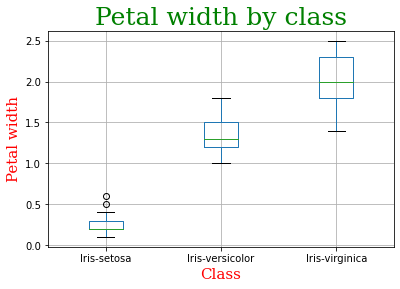

In [18]:
iris_nonans.boxplot(column='petal_width_cm', by='class')
font1 = {'family':'serif','color':'green','size':25}
font2 = {'family':'serif','color':'red','size':15}
plt.ylabel('Petal width',fontdict=font2)
plt.xlabel('Class',fontdict=font2)
plt.suptitle('')
plt.title('Petal width by class',fontdict=font1)
plt.show()

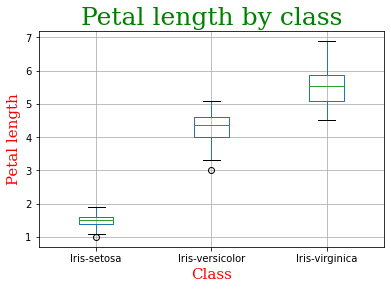

In [19]:
iris_nonans.boxplot(column='petal_length_cm', by='class')
font1 = {'family':'serif','color':'green','size':25}
font2 = {'family':'serif','color':'red','size':15}
plt.ylabel('Petal length',fontdict=font2)
plt.xlabel('Class',fontdict=font2)
plt.suptitle('')
plt.title('Petal length by class',fontdict=font1)
plt.show()

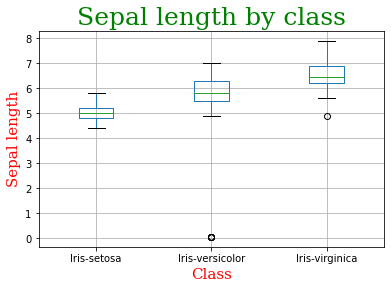

In [20]:
iris_nonans.boxplot(column='sepal_length_cm', by='class')
font1 = {'family':'serif','color':'green','size':25}
font2 = {'family':'serif','color':'red','size':15}
plt.ylabel('Sepal length',fontdict=font2)
plt.xlabel('Class',fontdict=font2)
plt.suptitle('')
plt.title('Sepal length by class',fontdict=font1)
plt.show()

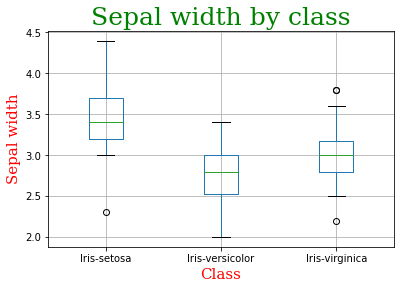

In [21]:
iris_nonans.boxplot(column='sepal_width_cm', by='class')
font1 = {'family':'serif','color':'green','size':25}
font2 = {'family':'serif','color':'red','size':15}
plt.ylabel('Sepal width',fontdict=font2)
plt.xlabel('Class',fontdict=font2)
plt.suptitle('')
plt.title('Sepal width by class',fontdict=font1)
plt.show()

In [33]:
q_low = iris_nonans["sepal_length_cm"].quantile(0.01)
q_hi  = iris_nonans["sepal_length_cm"].quantile(0.99)

In [34]:
iris_filtered = iris_nonans[(iris_nonans["sepal_length_cm"] < q_hi) & (iris_nonans["sepal_length_cm"] > q_low)]
iris_filtered

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,2.3,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [35]:
q_low = iris_filtered["sepal_width_cm"].quantile(0.01)
q_hi  = iris_filtered["sepal_width_cm"].quantile(0.99)
iris_filtered = iris_filtered[(iris_filtered["sepal_width_cm"] < q_hi) & (iris_filtered["sepal_width_cm"] > q_low)]
iris_filtered

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,2.3,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [36]:
q_low = iris_filtered["petal_length_cm"].quantile(0.01)
q_hi  = iris_filtered["petal_length_cm"].quantile(0.99)
iris_filtered = iris_filtered[(iris_filtered["petal_length_cm"] < q_hi) & (iris_filtered["petal_length_cm"] > q_low)]
iris_filtered

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,2.3,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [37]:
q_low = iris_filtered["petal_width_cm"].quantile(0.01)
q_hi  = iris_filtered["petal_width_cm"].quantile(0.99)
iris_filtered = iris_filtered[(iris_filtered["petal_width_cm"] < q_hi) & (iris_filtered["petal_width_cm"] > q_low)]
iris_filtered

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,2.3,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [38]:
iris_filtered.to_csv('iris-filtered.csv')